# Libraries and data

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import FastICA
from scipy.stats import kurtosis, skew

In [3]:
df = pd.read_csv('/content/winequality-white-balanced.csv', sep=",")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [5]:
df['class'].value_counts()

1    1644
0    1640
Name: class, dtype: int64

In [6]:
df['labels'] = df['class']

df_numerical = df.drop(['quality', 'class', 'labels'], axis=1)

scaling = StandardScaler()
df_numerical_scaled = scaling.fit_transform(df_numerical)

features = df_numerical_scaled
labels = df['labels']

In [7]:
len(features)

3284

In [8]:
len(features[0])

11

In [9]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)  # 0.33 0.2
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

In [10]:
df['labels'].value_counts()

1    1644
0    1640
Name: labels, dtype: int64

In [11]:
def print_metrics(prediction, real):

    print("Accuracy:", accuracy_score(prediction, real))
    print("Precision:", precision_score(prediction, real))
    print("Recall:", recall_score(prediction, real))
    print("F1-Score:", f1_score(prediction, real))
    print("ROC-AUC:", roc_auc_score(prediction, real))

In [12]:
def plot_learning_curve_f1(model, X, y, title):    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, 
                                                             scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="r", label='Training Scores')
    ax.plot(np.linspace(0.1, 1.0, 10)*100, valid_scores_mean, 'o-', color="g", label='Validation Scores')

    ax.set_xlabel('Training Size (in percent)')
    ax.set_ylabel('Mean F1 Score')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

# kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


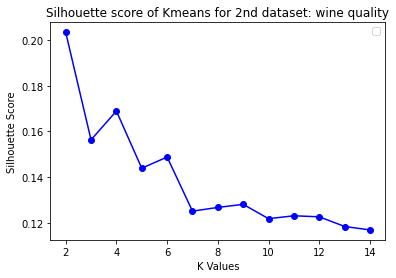

In [15]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 2nd dataset: wine quality')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


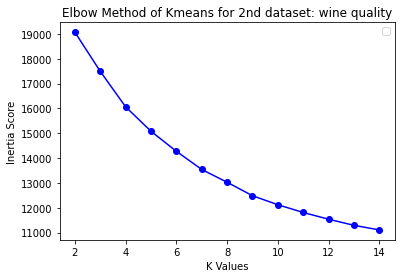

In [16]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 2nd dataset: wine quality')
ax.legend()
plt.show(fig)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

0.41409090909090907


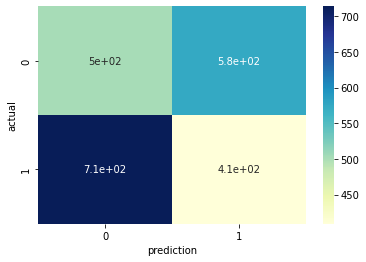

In [17]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score

In [18]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.021262632347463457
V Measure: 0.021180199380788963
Completeness: 0.02109840311340723
Adjusted RandIndex: 0.02908034029820745


0.3


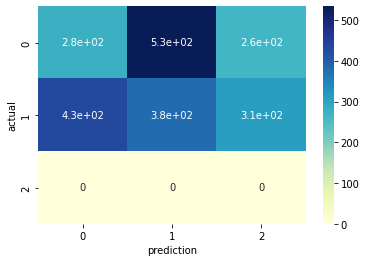

In [19]:
kmean = KMeans(n_clusters=3)
kmean.fit(X_train)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [20]:
best_kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.01385535696239327
V Measure: 0.01688847702686403
Completeness: 0.02162176636544505
Adjusted RandIndex: 0.020738028318611917


In [22]:
best_kmeans = KMeans(n_clusters=5, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.02649206010774824
V Measure: 0.03578808506309837
Completeness: 0.055134808240990936
Adjusted RandIndex: 0.02867650337343933


In [23]:
best_kmeans = KMeans(n_clusters=7, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.031840810339235984
V Measure: 0.0460873912050659
Completeness: 0.08340574872055426
Adjusted RandIndex: 0.031001387987319735


In [24]:
best_kmeans = KMeans(n_clusters=9, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.02789327085938178
V Measure: 0.04183460142778399
Completeness: 0.08363738982411668
Adjusted RandIndex: 0.023254361493214092


# EM

In [ ]:
from sklearn.mixture import GaussianMixture

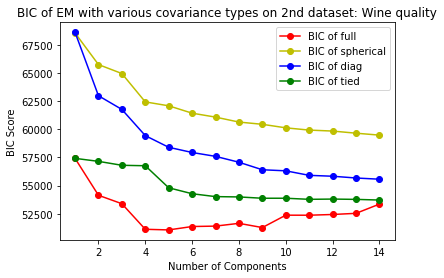

In [25]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train)
        bic_em = em.bic(X_train)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

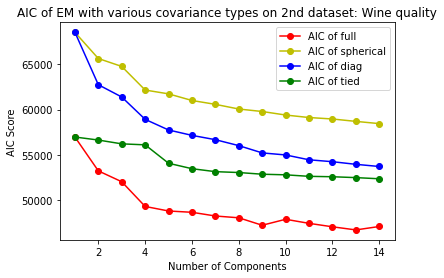

In [26]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train)
        aic_em = em.aic(X_train)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

0.060454545454545455


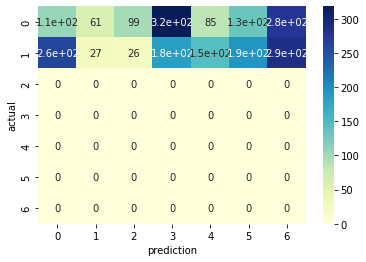

In [27]:
em = GaussianMixture(n_components=7, covariance_type='full', random_state=random_state)
em.fit(X_train)
ypred = em.predict(X_train)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [28]:
em = GaussianMixture(n_components=7,  covariance_type='full', random_state=random_state)
em.fit(features)

y_pred_em = em.predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.0236872937024719
V Measure: 0.03374764620490219
Completeness: 0.05866249774528922
Adjusted RandIndex: 0.027489029879410428


0.4304545454545455


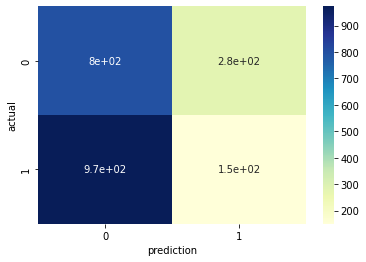

In [29]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_train)
ypred = em.predict(X_train)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [30]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(features)

y_pred_em = em.predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.03674517336335294
V Measure: 0.024588410023868936
Completeness: 0.018475861079830288
Adjusted RandIndex: 0.012891437635612213


# PCA

In [ ]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(X_train)
transformed = pca.transform(X_train)

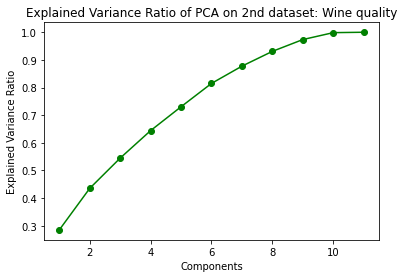

In [32]:
fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , np.cumsum(pca.explained_variance_ratio_), "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio of PCA on 2nd dataset: Wine quality')
plt.show(fig)

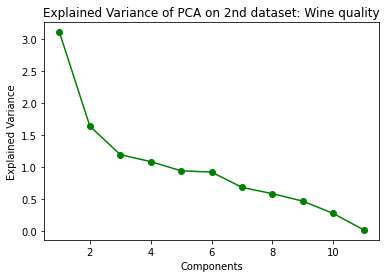

In [33]:
fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , pca.explained_variance_, "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variance of PCA on 2nd dataset: Wine quality')
plt.show(fig)

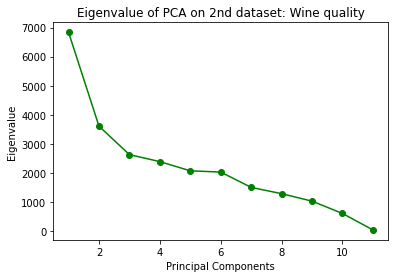

In [34]:
fig, ax = plt.subplots()

ax.plot(range(1, pca.n_components_ +1) , [i**2 for i in pca.singular_values_], "g-o")

ax.set_xlabel('Principal Components')
ax.set_ylabel('Eigenvalue')
ax.set_title('Eigenvalue of PCA on 2nd dataset: Wine quality')
plt.show(fig)

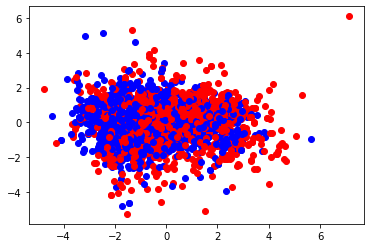

In [35]:
X = X_train
colors = ['red', 'blue']
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)

for x, y in zip(Xpca, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

In [11]:
X = X_train
colors = ['red', 'blue']
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)

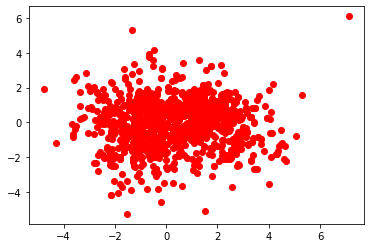

In [12]:
y_train_list = list(y_train)
i = 0
for x, y in zip(Xpca, y_train):
  if y_train_list[i]==0:
    plt.scatter(x[0], x[1], c=colors[y])
  i = i+1  

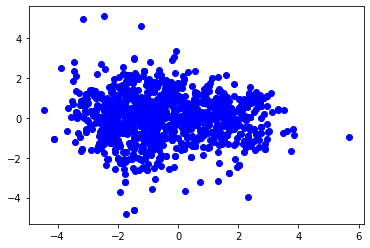

In [13]:
y_train_list = list(y_train)
i = 0
for x, y in zip(Xpca, y_train):
  if y_train_list[i]==1:
    plt.scatter(x[0], x[1], c=colors[y])
  i = i+1  

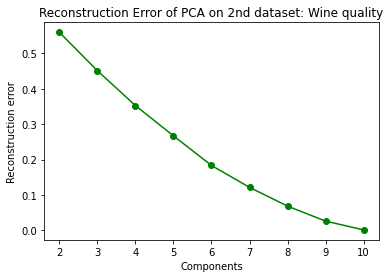

In [38]:
reconstruct_error_list = []
variance_list = []

for i in range(2, 11):
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_pca = pca.transform(X_train)

    X_reconstruct = pca.inverse_transform(X_pca)

    reconstruct_error =  ((X_train - X_reconstruct) ** 2).mean()
    reconstruct_error_list.append(reconstruct_error)

    variance = np.mean(pca.explained_variance_)
    variance_list.append(variance)

fig, ax = plt.subplots()
ax.plot(range(2, 11), reconstruct_error_list, "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Reconstruction error')
ax.set_title('Reconstruction Error of PCA on 2nd dataset: Wine quality')
plt.show(fig)

# PCA + Kmeans

In [39]:
pca_final = PCA(n_components=3)
pca_final.fit(X_train)
X_pca_final = pca_final.transform(X_train)

No handles with labels found to put in legend.


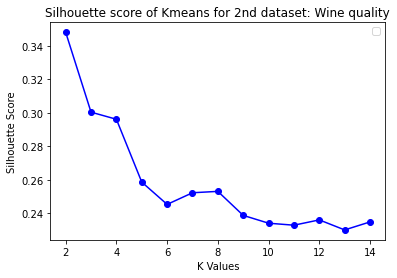

In [41]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_pca_final)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_pca_final, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


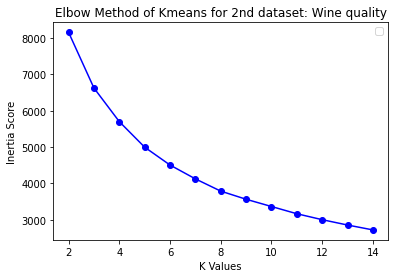

In [42]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

0.4113636363636364


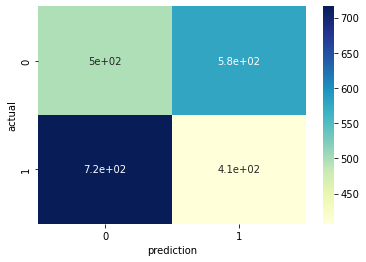

In [43]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_pca_final)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [44]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_pca_final)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.022654331105283858
V Measure: 0.022569645103610644
Completeness: 0.022485589887238804
Adjusted RandIndex: 0.030985331685607805


In [13]:
pca_final = PCA(n_components=2)
pca_final.fit(X_train)
X_pca_final = pca_final.transform(X_train)

0.41045454545454546


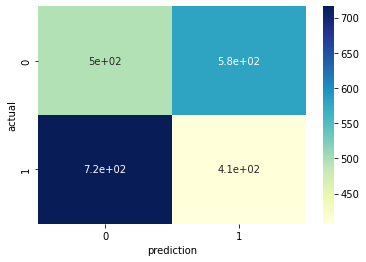

In [14]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_pca_final)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

# PCA + EM

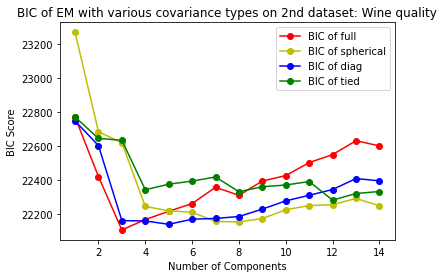

In [45]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_pca_final)
        bic_em = em.bic(X_pca_final)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

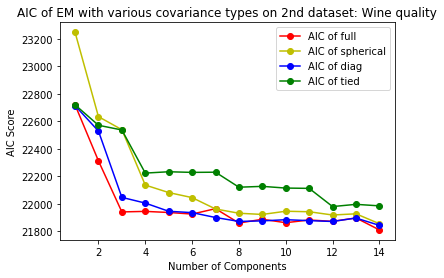

In [46]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_pca_final)
        aic_em = em.aic(X_pca_final)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

0.3740909090909091


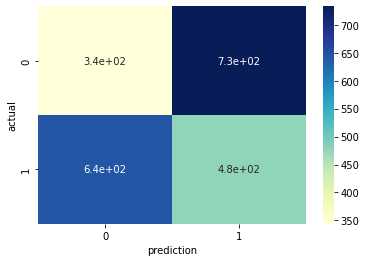

In [47]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_pca_final)
ypred = em.predict(X_pca_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [48]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_pca_final)

y_pred_em = em.predict(X_pca_final)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.04797257955293064
V Measure: 0.047799785379296494
Completeness: 0.047628231525308075
Adjusted RandIndex: 0.06298664280268654


0.41454545454545455


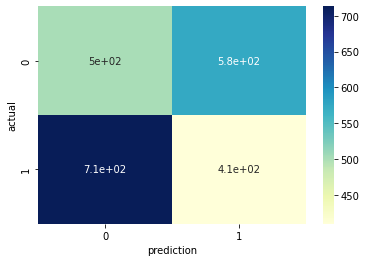

In [15]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_pca_final)
ypred = em.predict(X_pca_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

# ICA

In [ ]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis, skew

No handles with labels found to put in legend.


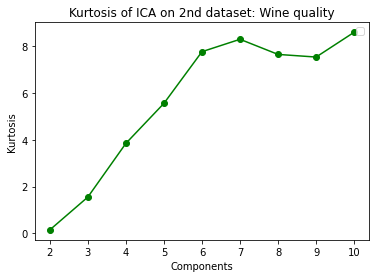

In [49]:
kurtosis_ica = []

for i in range(2, 11):
    ica = FastICA(n_components=i, random_state=random_state)
    X_train_ica = ica.fit_transform(X_train)
    kurtosis_mean = np.mean(kurtosis(X_train_ica))
    kurtosis_ica.append(kurtosis_mean)

fig, ax = plt.subplots()
ax.plot(range(2, 11) , kurtosis_ica, "g-o")
ax.set_xlabel('Components')
ax.set_ylabel('Kurtosis')
ax.set_title('Kurtosis of ICA on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

# ICA + kmeans

In [50]:
ica_final = FastICA(n_components=7, random_state=random_state)
X_train_ica = ica_final.fit_transform(X_train)

In [51]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train_ica)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train_ica, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


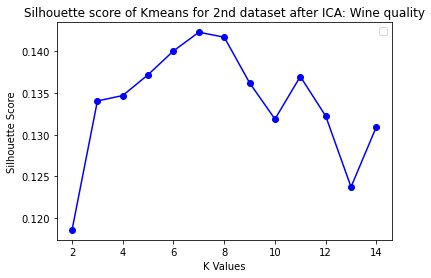

In [52]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 2nd dataset after ICA: Wine quality')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


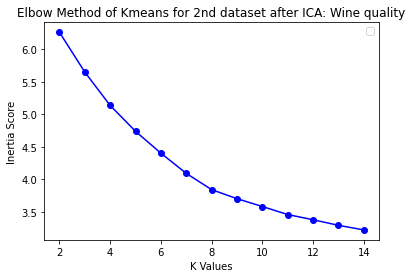

In [53]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 2nd dataset after ICA: Wine quality')
ax.legend()
plt.show(fig)

0.5690909090909091


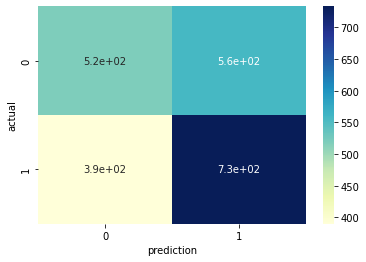

In [54]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_ica)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [55]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train_ica)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.013811464471020597
V Measure: 0.013661022408392011
Completeness: 0.01351382242651413
Adjusted RandIndex: 0.018648652069071608


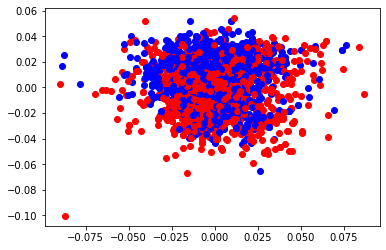

In [56]:
X_train_ica = FastICA(n_components=2).fit_transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_ica, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

In [16]:
ica_final = FastICA(n_components=2, random_state=random_state)
X_train_ica = ica_final.fit_transform(X_train)

0.41454545454545455


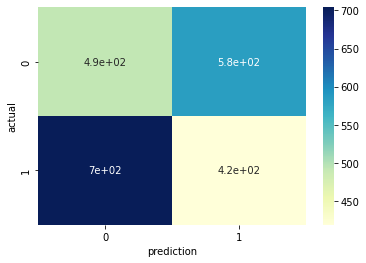

In [17]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_ica)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

# ICA + EM

In [57]:
ica_final = FastICA(n_components=7, random_state=random_state)
X_ica_final = ica_final.fit_transform(X_train)

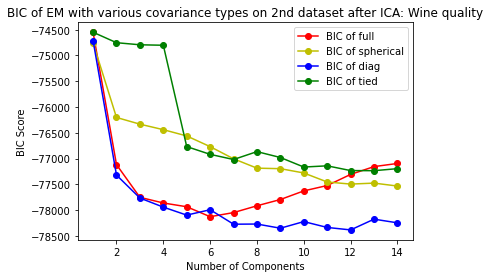

In [58]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_ica_final)
        bic_em = em.bic(X_ica_final)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 2nd dataset after ICA: Wine quality')
ax.legend()
plt.show(fig)

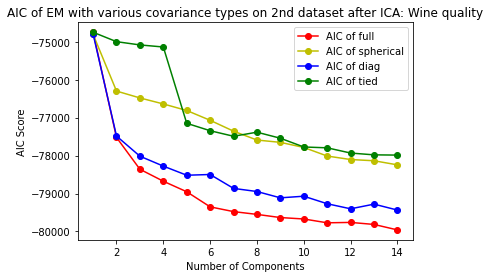

In [59]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_ica_final)
        aic_em = em.aic(X_ica_final)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 2nd dataset after ICA: Wine quality')
ax.legend()
plt.show(fig)

0.5513636363636364


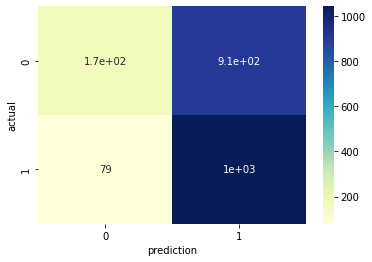

In [60]:
em = GaussianMixture(n_components=2, covariance_type='diag', random_state=random_state)

em.fit(X_ica_final)
ypred = em.predict(X_ica_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [61]:
em = GaussianMixture(n_components=2,  covariance_type='diag', random_state=random_state)
em.fit(X_ica_final)

y_pred_em = em.predict(X_ica_final)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.027065262883555773
V Measure: 0.018240856759389173
Completeness: 0.013755868946797065
Adjusted RandIndex: 0.010113247461060518


In [18]:
ica_final = FastICA(n_components=2, random_state=random_state)
X_ica_final = ica_final.fit_transform(X_train)

0.4168181818181818


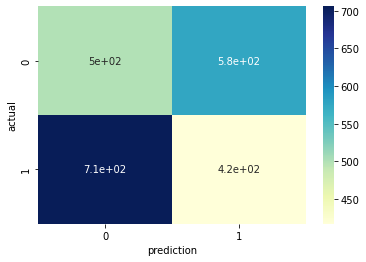

In [19]:
em = GaussianMixture(n_components=2, covariance_type='diag', random_state=random_state)

em.fit(X_ica_final)
ypred = em.predict(X_ica_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

# Randomized Projections

In [ ]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection

In [62]:
def run_rp():
    err_list = []

    for i in range(2, 15):
        rp = GaussianRandomProjection(n_components=i)
        rp.fit(X_train)
        X_transformed = rp.transform(X_train)

        X_reconstruct = X_transformed.dot(rp.components_) + np.mean(X_train, axis=0)

        error = np.mean((X_train - X_reconstruct)**2)

        err_list.append(error)

    return err_list

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 13).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 14).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the numb

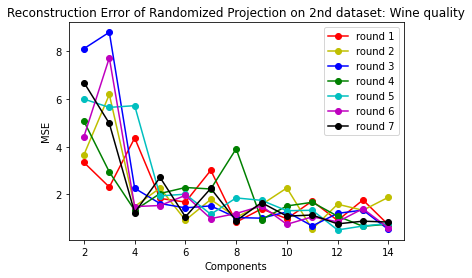

In [63]:
fig, ax = plt.subplots()
color = ['r-o', 'y-o', 'b-o', 'g-o', 'c-o', 'm-o', 'k-o']

for i in range(0, 7):
    err = run_rp()
    ax.plot(range(2, 15), err, color[i], label=f'round {i+1}')

ax.set_xlabel('Components')
ax.set_ylabel('MSE')
ax.set_title('Reconstruction Error of Randomized Projection on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

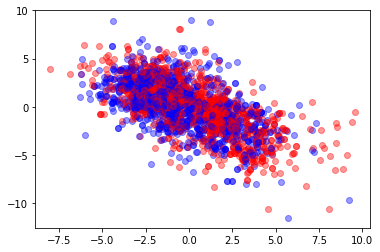

In [64]:
rp = GaussianRandomProjection(n_components=2, eps=0.1, random_state=random_state)
rp.fit(X_train)
X_train_rp = rp.transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_rp, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the numb

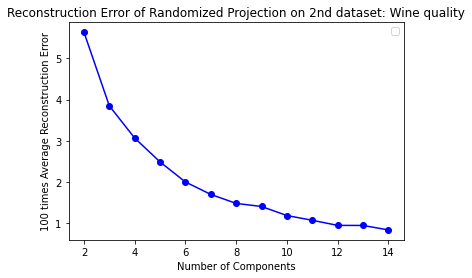

In [65]:
# 100 times
err_list = []

for i in range(2, 15):
    recontruct_err = []    
    for j in range(1, 101):
        rp = GaussianRandomProjection(n_components=i)
        rp.fit(X_train)
        X_transformed = rp.transform(X_train)
        X_reconstructed = X_transformed.dot(rp.components_) + np.mean(X_train, axis=0)
        error = np.mean((X_train - X_reconstructed)**2)
        recontruct_err.append(error)
    err_list.append(np.mean(recontruct_err))
    
fig, ax = plt.subplots()
ax.plot(range(2, 15) , err_list, "b-o")
ax.set_xlabel('Number of Components')
ax.set_ylabel('100 times Average Reconstruction Error')
ax.set_title('Reconstruction Error of Randomized Projection on 2nd dataset: Wine quality')
ax.legend()
plt.show(fig)

# Randomized Projection + Kmeans

In [66]:
final_rp = GaussianRandomProjection(n_components=12)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


In [67]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train_rp)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train_rp, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


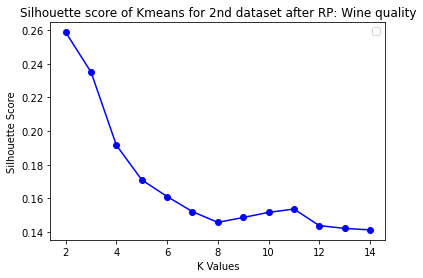

In [68]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 2nd dataset after RP: Wine quality')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


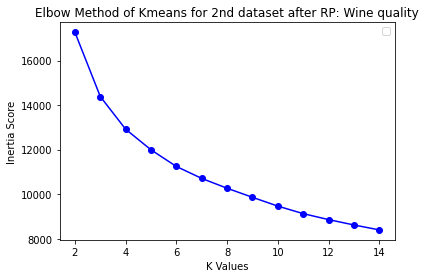

In [69]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 2nd dataset after RP: Wine quality')
ax.legend()
plt.show(fig)

0.4172727272727273


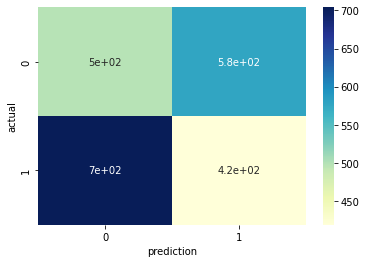

In [70]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_rp)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [71]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train_rp)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.019669278339592654
V Measure: 0.019609891183526663
Completeness: 0.01955086156145671
Adjusted RandIndex: 0.026933043906758238


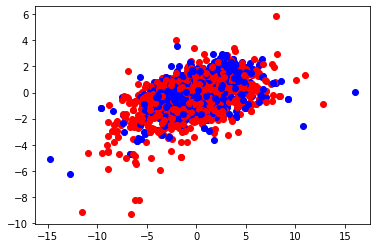

In [72]:
X_train_rp = GaussianRandomProjection(n_components=2).fit_transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_rp, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

# Randomized Projection + EM

In [73]:
final_rp = GaussianRandomProjection(n_components=12)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (11 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


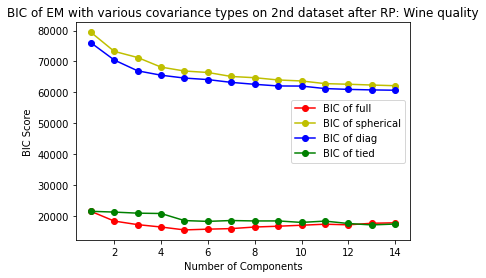

In [74]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train_rp)
        bic_em = em.bic(X_train_rp)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 2nd dataset after RP: Wine quality')
ax.legend()
plt.show(fig)

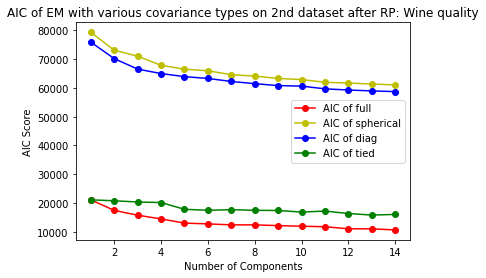

In [75]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train_rp)
        aic_em = em.aic(X_train_rp)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 2nd dataset after RP: Wine quality')
ax.legend()
plt.show(fig)

0.41545454545454547


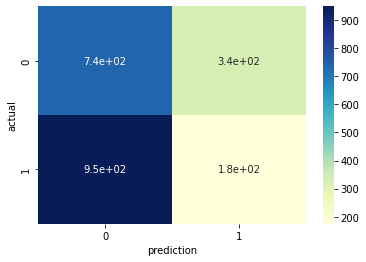

In [76]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)

em.fit(X_train_rp)
ypred = em.predict(X_train_rp)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [77]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_train_rp)

y_pred_em = em.predict(X_train_rp)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.032514792372528266
V Measure: 0.028573201371053254
Completeness: 0.02548392418598316
Adjusted RandIndex: 0.02815478532890319


# Other method: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(random_forest.feature_importances_)

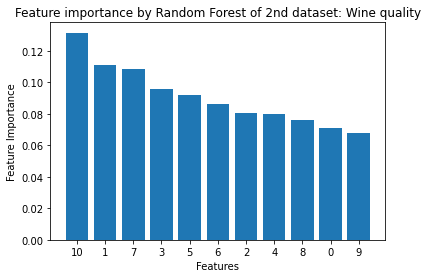

In [79]:
plt.bar([str(i) for i in ascending_order[::-1]], random_forest.feature_importances_[ascending_order[::-1]])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title('Feature importance by Random Forest of 2nd dataset: Wine quality')
plt.show()

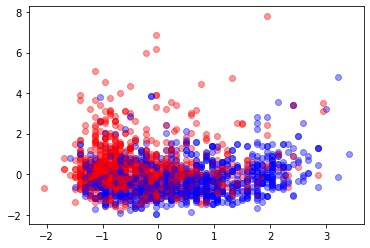

In [80]:
colors = ['red', 'blue']
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

for x, y in zip(X_sub, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

plt.show()

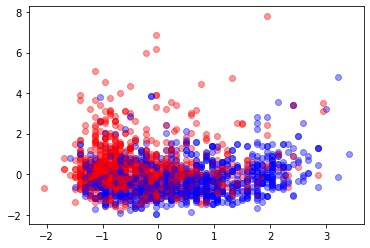

In [81]:
colors = ['red', 'blue']
important_features = ascending_order[::-1][:4]
X_sub = X_train[:,important_features]

for x, y in zip(X_sub, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

plt.show()

# Random Forest + Kmeans

In [82]:
rf = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(rf.feature_importances_)
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

In [83]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_sub)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_sub, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


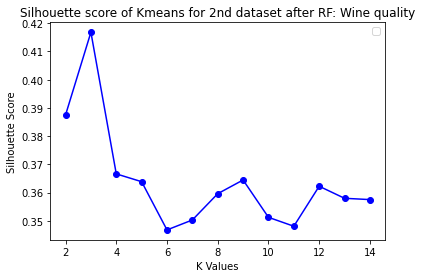

In [84]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 2nd dataset after RF: Wine quality')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


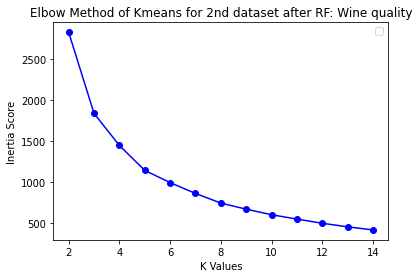

In [85]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 2nd dataset after RF: Wine quality')
ax.legend()
plt.show(fig)

0.6509090909090909


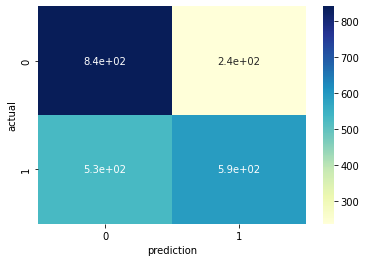

In [86]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_sub)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [87]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_sub)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.07740939825676456
V Measure: 0.0756304142187882
Completeness: 0.07393136069879098
Adjusted RandIndex: 0.09013367843262295


# Random Forest + EM

In [88]:
rf = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(rf.feature_importances_)
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

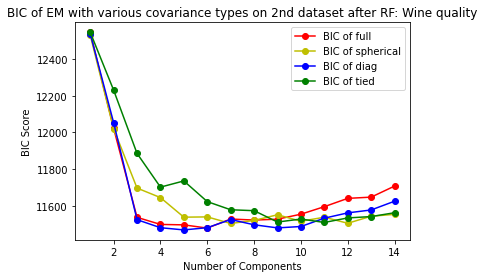

In [89]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_sub)
        bic_em = em.bic(X_sub)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 2nd dataset after RF: Wine quality')
ax.legend()
plt.show(fig)

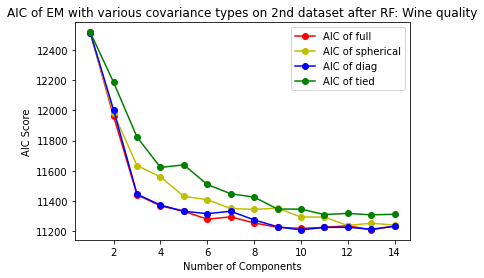

In [90]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_sub)
        aic_em = em.aic(X_sub)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 2nd dataset after RF: Wine quality')
ax.legend()
plt.show(fig)

0.35


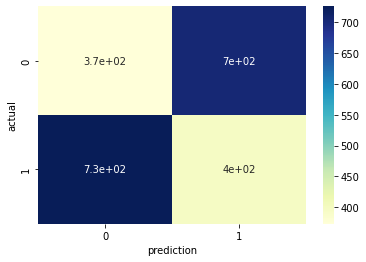

In [91]:
em = GaussianMixture(n_components=2, covariance_type='diag', random_state=random_state)

em.fit(X_sub)
ypred = em.predict(X_sub)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [92]:
em = GaussianMixture(n_components=2,  covariance_type='diag', random_state=random_state)
em.fit(X_sub)

y_pred_em = em.predict(X_sub)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.06597229467308757
V Measure: 0.0659826801159276
Completeness: 0.06599306882906178
Adjusted RandIndex: 0.08958616835879284
